<a href="https://colab.research.google.com/github/sadrireza/Neural-Networks/blob/main/Using_Tensorflow_Datasets_for_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras Datasets

In [58]:
from tensorflow.keras import datasets
import tensorflow as tf

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(train_images)

numpy.ndarray

## Tensorflow Datasets

In [4]:
!pip install tensorflow -datasets


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -d


In [5]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [67]:
train_dataset, test_dataset = tfds.load('mnist', split=['train', 'test'],
                                        as_supervised=True)

In [68]:
def preprocess_data(images, labels):
    images = tf.reshape(images, (len(images), 784))
    inputs = {"images": images, "labels": labels}
    outputs = inputs
    return outputs['images'], outputs['labels']

In [70]:
train_dataset2 = train_dataset.batch(128).map(
    lambda x, y: preprocess_data(x, y),
        num_parallel_calls=tf.data.AUTOTUNE).prefetch(
            tf.data.AUTOTUNE)
test_dataset2 = test_dataset.batch(128).map(
    preprocess_data, num_parallel_calls=tf.data.AUTOTUNE).prefetch(
        tf.data.AUTOTUNE)

In [11]:
print (train_labels.size)
print (train_labels.shape)
print (train_labels.ndim)
print (train_images.ndim)
print (train_images.size)
print (train_images.shape)
print (train_images.dtype)
print (train_labels.dtype)

60000
(60000,)
1
3
47040000
(60000, 28, 28)
uint8
uint8


In [12]:
train_images_vector = train_images.reshape (60000 , 784)
# print(train_images_vector.shape)
train_images_vector.shape

(60000, 784)

In [13]:
train_images_vector = train_images.astype('float32')
train_images_vector.dtype

dtype('float32')

In [44]:
train_images_vector.shape

(60000, 784)

In [72]:
sample=train_dataset2.take(1)
for image, label in sample:
  print (image.shape)
  print (label)

(128, 784)
tf.Tensor(
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3 0 9 4 9 0
 6 8 4 7 2 6 0 3 1 1 7 2 4 4 6 5 1 9 3 2 4 3 4 4 7 5 8 1 1 4 1 5 3 5 8 4 1
 1 4 5 3 2 4 1 4 8 1 2 1 9 0 7 6 7 4 4 9 7 5 6 8 4 6 9 2 9 4 4 9 5 4 5 7 7
 1 8 3 7 9 8 4 9 2 8 0 3 9 4 7 6 6], shape=(128,), dtype=int64)


## In Case of Changing the Variable before the Loop:

In [18]:
#for item in tdfs.as_numpy(sample)
#print(type(item['image']))
#...

##Visualization for Keras using Matplotlib

In [19]:
import matplotlib.pyplot as plt

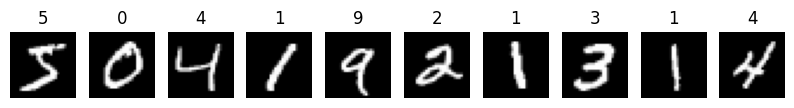

In [20]:
fig , axes = plt.subplots(1,10,figsize=(10,5))
for i in range (len(axes)):
  axes[i].imshow(train_images[i],cmap='gray')
  axes[i].set_title(train_labels[i])
  axes[i].set_axis_off()

##Visualization for Tensorflow Datasets

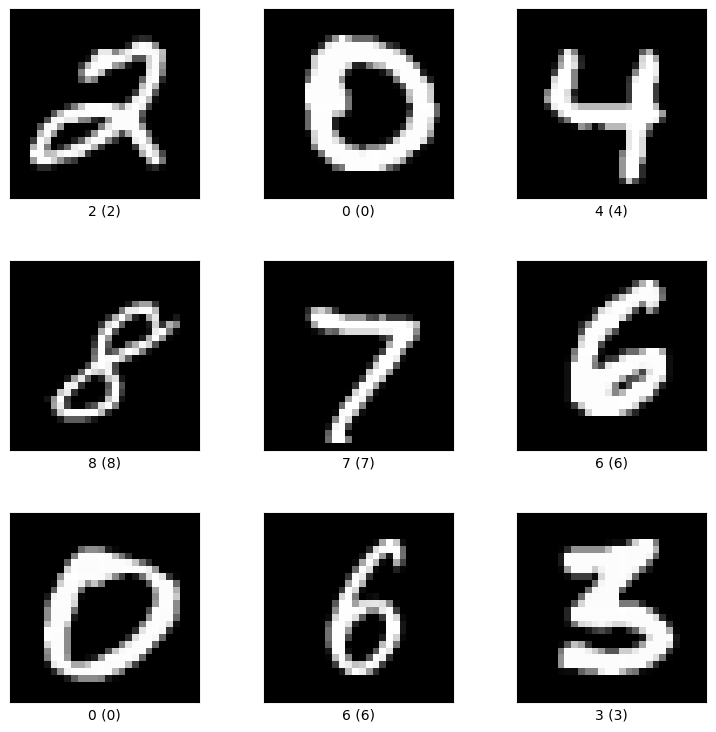

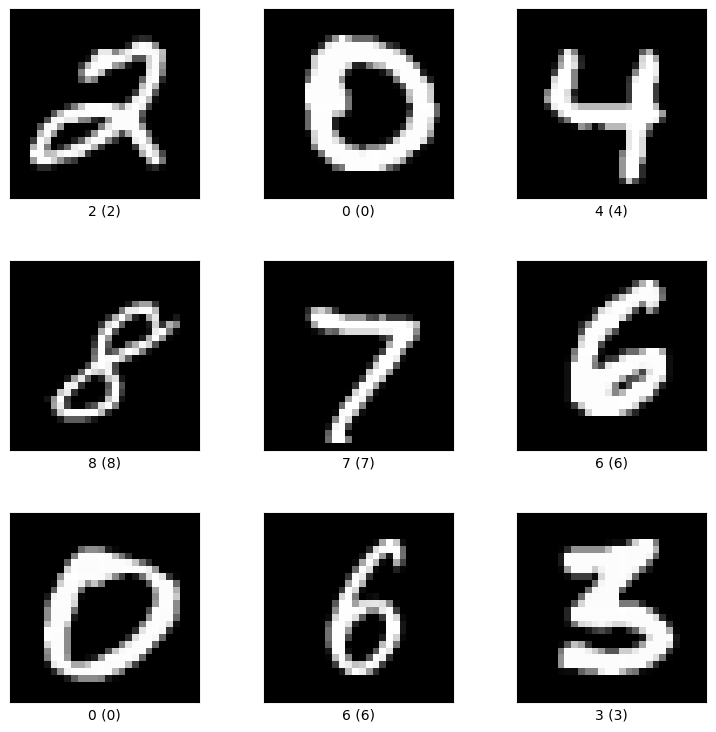

In [21]:
#tfds.show_examples(ds[0])
#since we get error, we need more parameters while loading tensorflow datasets
ds,info=tfds.load('mnist',split=['train','test'],with_info=True)

#Show
tfds.show_examples(ds[1],info)

In [61]:
#Changing the type of vars in TF from dict to tuple so that we can use them for training
train_dataset, test_dataset = tfds.load('mnist',split=['train','test'], as_supervised=True)

In [23]:
print(len(item))

2


In [24]:
for image, label in sample1:
  print(image.shape)
  print(label)

(28, 28, 1)
tf.Tensor(4, shape=(), dtype=int64)


##Model design

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
     layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

##Training

In [75]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [76]:
model.fit(train_dataset2, epochs=5, batch_size=128)

Epoch 1/5


469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8344 - loss: 15.7838
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9513 - loss: 0.7643
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9631 - loss: 0.5026
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9719 - loss: 0.3869
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9753 - loss: 0.3137
